<a href="https://colab.research.google.com/github/Silverlake86/BreastCancerDiagnosis/blob/main/breastcancer_revise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PERBANDINGAN METODE ALGORITMA *RANDOM FOREST* DENGAN *XGBOOST* DALAM MENDETEKSI KANKER PAYUDARA**




# ▶ **Import Libraries**


---









In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# ▶ **Load data dan tampilkan data**

---


In [ ]:
from google.colab import files
data = files.upload()
df = pd.read_csv('data.csv')
df.head()

Saving data.csv to data.csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


▶ **Menghitung jumlah baris dan kolum pada data set - Hasil (569 Baris, 33 Kolum)**

---



In [ ]:
df.shape

(569, 33)

# ▶ **Data Cleaning**

---


▶ **Menghitung jumlah data yang kosong pada setiap kolum - Terdapat satu kolum yang memiliki data kosong *Unamed 32*** 


---




In [ ]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

▶ **Menghapus kolum *Unamed 32* karena kolum tersebut tidak mempengaruhi hasil diagnosa**

---



In [ ]:
df = df.iloc[:,1:-1]

▶ **Menghitung ulang baris dan kolum dari data yang sudah diubah**

---



In [ ]:
df.shape

(569, 31)

▶ **Menghitung jumlah data yang tergolong Benign(B) atau Malignant(M)**


---



In [ ]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

▶ **Menunjukan data *diagnosis* dalam bentuk grafik**


---



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


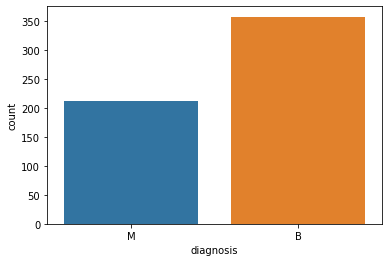

In [ ]:
sns.countplot(df['diagnosis'], label = 'count')

▶ **Melihat tipe data dari setiap kolum**

---



In [ ]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

▶ **Mengubah data menjadi kode**


---





In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
df.iloc[:, 0] = labelencoder_X.fit_transform(df.iloc[:, 0].values)

df.iloc[:, 0].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

▶ **Membuat pair plot**

---



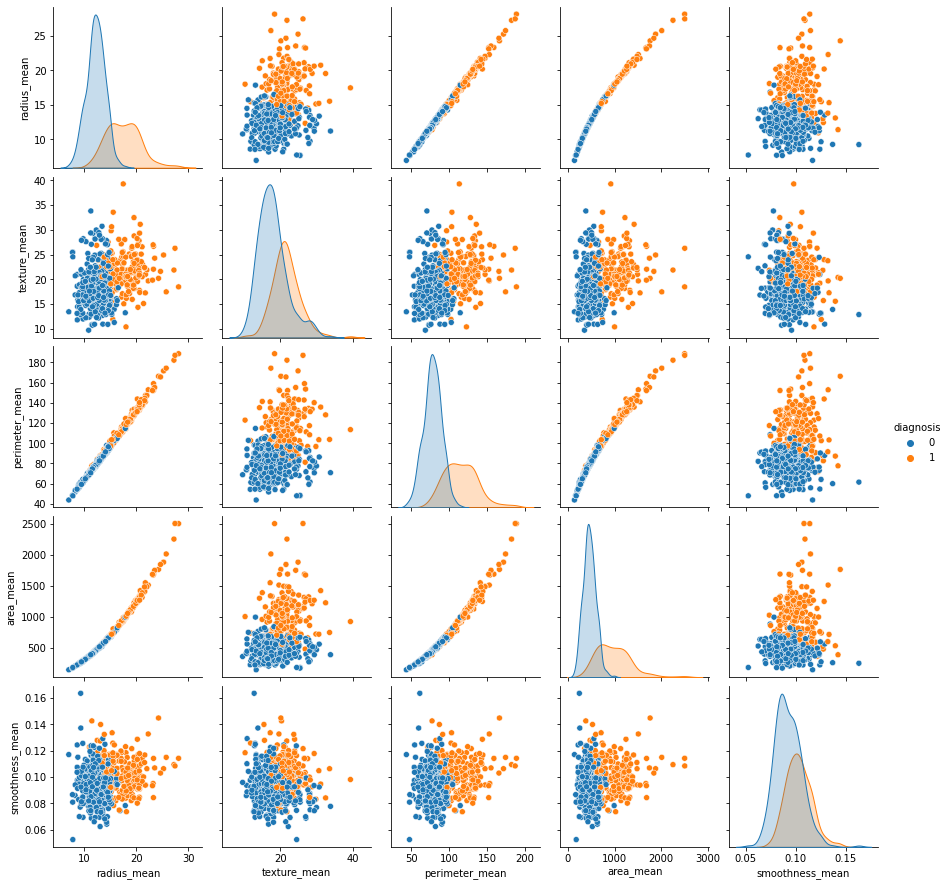

In [ ]:
sns.pairplot(df.iloc[:, 0:6], hue = 'diagnosis')

▶ **Print baris 5 pertama dari data yang sudah diubah**

---



In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# ▶ **Feature Selection**

---


▶ **Mencari korelasi antara setiap atribut terhadap atribut *Diagnosa* .**

---



In [ ]:
corellation = df.iloc[:,0:31].corr()
corellation

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


▶ **Menampilkan *Heatmap* untuk korelasi**

---



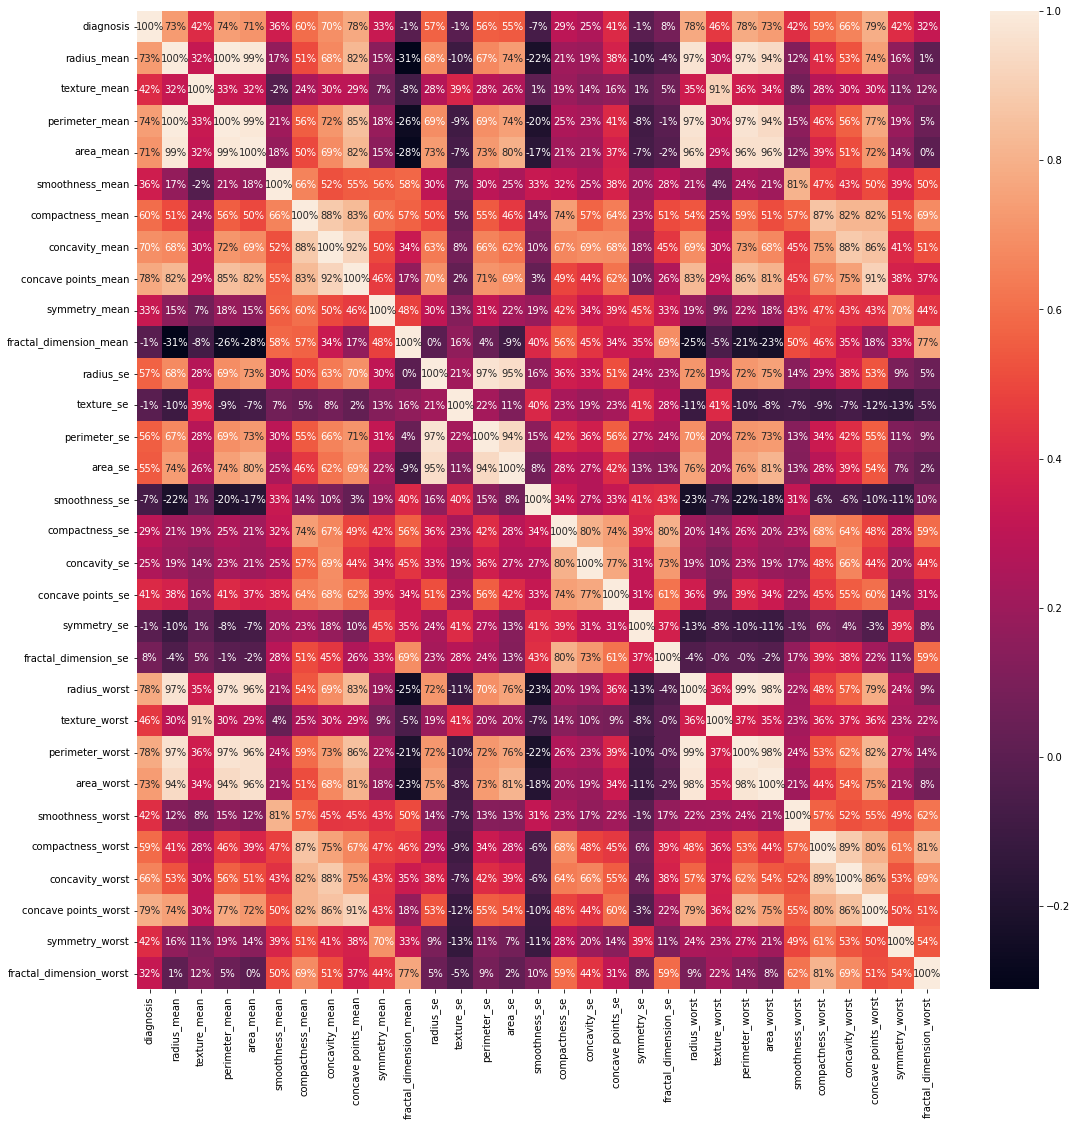

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(corellation, annot = True, fmt = '.0%')

▶ **Membuat *Data Frame* baru untuk atribut yang memiliki korelasi tinggi (diatas 70%) untuk atribut *Diagnosa* .**

---



In [ ]:
df_new = df.filter(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst'], axis = 1)
df_new.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
0,1,17.99,122.80,1001.0,0.3001,0.14710,25.38,184.60,2019.0,0.2654
1,1,20.57,132.90,1326.0,0.0869,0.07017,24.99,158.80,1956.0,0.1860
2,1,19.69,130.00,1203.0,0.1974,0.12790,23.57,152.50,1709.0,0.2430
3,1,11.42,77.58,386.1,0.2414,0.10520,14.91,98.87,567.7,0.2575
4,1,20.29,135.10,1297.0,0.1980,0.10430,22.54,152.20,1575.0,0.1625


# ▶ **Data Splitting**

---


▶ **Membagi data menjadi Independent (X - Setiap Kolum selain *Diagnosis*) dan Dependent (Y - Kolum *Diagnosis*) dataset**

---



In [ ]:
X = df_new.drop(labels = ['diagnosis'], axis = 1)
Y = df_new['diagnosis']

▶ ***Stratified split* - Membagi data set 75% menjadi data pelatihan, dan 25% menjadi data pengujian**

---



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0, stratify = Y)

X_train.shape, X_test.shape

((426, 9), (143, 9))

In [ ]:
X_train = X_train.values
X_test = X_test.values

# ▶ **Parameter Tuning**

---


▶ **Scale data (*Feature Scaling*)**

---



In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


▶ **Mencari Attribut Terbaik untuk Random Forest Menggunakan Grade Search CV**

---



In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=0)

param_grid = { 
    'n_estimators': [1, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator = forest, param_grid = param_grid, cv = 5)
CV_rfc.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 100]})

▶ **Menampilkan Attribut Terbaik untuk Random Forest**

---



In [ ]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 100}

▶ **Mencari Attribut Terbaik untuk XGBoost Menggunakan Grade Search CV**

---



In [ ]:
from xgboost import XGBClassifier
XGB = XGBClassifier(random_state = 0)

param_grid = { 
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1],
    'max_depth' : [1, 11, 2]
}

from sklearn.model_selection import GridSearchCV
CV_XGB = GridSearchCV(estimator = XGB, param_grid = param_grid, cv = 5)
CV_XGB.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1],
                         'max_depth': [1, 11, 2],
                         'n_estimators': [100, 200, 300, 400, 500]})

▶ **Menampilkan Attribut Terbaik untuk XGBoost**

---



In [ ]:
CV_XGB.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 300}

# ▶ **Data Training**

---


▶ **Membuat model yang akan digunakan**

---



▶ ***Random Forest* Model**

---



In [ ]:
forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth = 4, max_features = 'auto', random_state = 0)
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, random_state=0)

▶ ***XGBoost* Model**

---



In [ ]:
XGB = XGBClassifier(n_estimators = 300, learning_rate = 0.1, max_depth = 1, random_state = 0)
XGB.fit(X_train, Y_train)

XGBClassifier(max_depth=1, n_estimators=300)

# ▶ **Menampilkan Hasil**

---


▶ **Mendapatkan nilai akurasi untuk setiap model**

---



In [ ]:
print('Random Forest Classifier Training Accuracy: ', forest.score(X_train, Y_train))
print('XGBoost Training Accuracy: ', XGB.score(X_train, Y_train))

Random Forest Classifier Training Accuracy:  0.9812206572769953
XGBoost Training Accuracy:  0.9788732394366197


▶ **Menampilkan Hasil *Accuracy, Precision, dan Recall***

---



In [ ]:
from sklearn.metrics import classification_report

print('Random Forest Classifier')
print(classification_report(Y_test, forest.predict(X_test)))
print()

print('XGBoost')
print(classification_report(Y_test, XGB.predict(X_test)))
print()

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        90
           1       0.93      0.96      0.94        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143


XGBoost
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        90
           1       0.96      0.94      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143




▶ **Membuat *function* untuk mengubah kode *1/0* menjadi *M/B* .**

---



In [ ]:
def convertor1(z_prediction):
  for i in range (len(z_prediction)):
    if z_prediction[i] == '1':
      z_prediction[i] = 'M'
    else:
      z_prediction[i] = 'B'

def convertor2(z_prediction):
  for i in range (len(z_prediction)):
    if z_prediction[i] == '1':
      z_prediction[i] = 'Malignant'
    else:
      z_prediction[i] = 'Benign'

▶ **Print Hasil Prediksi dari model Random Forest**

---

In [ ]:
prediction = forest.predict(X_test)
z_prediction = [str(i) for i in prediction]
Y_actual = [str(i) for i in Y_test]
convertor1(z_prediction)
convertor1(Y_actual)

true = 0
false = 0
M_true = 0
M_false = 0
B_true = 0
B_false = 0

for i, j in zip(prediction, Y_test):
    if i == j:
        true = true + 1
        if i == 1:
          M_true = M_true + 1
        else:
          B_true = B_true + 1
    else:
        false = false + 1
        if i == 1:
          M_false = M_false + 1
        else:
          B_false = B_false + 1

print("Random Forest Classifier")
print("Prediction:")
print(z_prediction)
print("Actual: ")
print(Y_actual)
print()
print("True = ", true)
print("False = ", false)
print()
print("Predict Benign True (Real = Benign) = ", B_true)
print("Predict Benign False (Real = Malignant)= ", B_false)
print()
print("Predict Malignant True (Real = Malignant) = ", M_true)
print("Predict Malignant False (Real = Benign) = ", M_false)


Random Forest Classifier
Prediction:
['M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B']
Actual: 
['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M

▶ **Print Hasil Prediksi dari model XGBoost**

---

In [ ]:
prediction = XGB.predict(X_test)
z_prediction = [str(i) for i in prediction]
Y_actual = [str(i) for i in Y_test]
convertor1(z_prediction)
convertor1(Y_actual)

true = 0
false = 0
M_true = 0
M_false = 0
B_true = 0
B_false = 0

for i, j in zip(prediction, Y_test):
    if i == j:
        true = true + 1
        if i == 1:
          M_true = M_true + 1
        else:
          B_true = B_true + 1
    else:
        false = false + 1
        if i == 1:
          M_false = M_false + 1
        else:
          B_false = B_false + 1

print("XGBoost")
print("Prediction:")
print(z_prediction)
print("Actual: ")
print(Y_actual)
print()
print("True = ", true)
print("False = ", false)
print()
print("Predict Benign True (Real = Benign) = ", B_true)
print("Predict Benign False (Real = Malignant)= ", B_false)
print()
print("Predict Malignant True (Real = Malignant) = ", M_true)
print("Predict Malignant False (Real = Benign) = ", M_false)


XGBoost
Prediction:
['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B']
Actual: 
['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B',

# ▶ **Prototype**

---


In [ ]:
filename = 'finalized_model.pkl'
pickle.dump(forest, open(filename, 'wb'))

In [ ]:
loaded = pickle.load(open(filename,'rb'))
result = loaded.predict(X_test)
print(result)

[1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0
 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1
 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1
 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0]


In [ ]:
filename = 'finalized_model.sav'
joblib.dump(forest, filename)

['finalized_model.sav']

In [ ]:
loaded = joblib.load(filename)
result = loaded.predict(X_test)
print(result)

[1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0
 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1
 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1
 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0]


# ▶ **Manual**

---


▶ **Menampilkan Hasil *Accuracy, Precision, dan Recall (Manual, Random Forest)***

---



In [ ]:
from sklearn.metrics import confusion_matrix
cm_forest = confusion_matrix(Y_test, forest.predict(X_test))

TP_forest = cm_forest[0][0]
TN_forest = cm_forest[1][1]
FN_forest = cm_forest[1][0]
FP_forest = cm_forest[0][1]

print(cm_forest)
print()
print("Random Forest Accuracy: ", (TP_forest + TN_forest) / (TP_forest + TN_forest + FN_forest + FP_forest))
print("Random Forest Precision: ", TP_forest / (TP_forest + FP_forest))
print("Random Forest Recall: ", TP_forest / (TP_forest + FN_forest))

[[86  4]
 [ 2 51]]

Random Forest Accuracy:  0.958041958041958
Random Forest Precision:  0.9555555555555556
Random Forest Recall:  0.9772727272727273


▶ **Menampilkan Hasil *Accuracy, Precision, dan Recall (Manual, XGBoost)***

---



In [ ]:
cm_XG = confusion_matrix(Y_test, XGB.predict(X_test))

TP_XG = cm_XG[0][0]
TN_XG = cm_XG[1][1]
FN_XG = cm_XG[1][0]
FP_XG = cm_XG[0][1]

print(cm_XG)
print()
print("XGBoost Accuracy: ", (TP_XG + TN_XG) / (TP_XG + TN_XG + FN_XG + FP_XG))
print("XGBoost Precision: ", TP_XG / (TP_XG + FP_XG))
print("XGBoost Recall: ", TP_XG / (TP_XG + FN_XG))

[[88  2]
 [ 3 50]]

XGBoost Accuracy:  0.965034965034965
XGBoost Precision:  0.9777777777777777
XGBoost Recall:  0.967032967032967
